In [1]:
import heapq
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

In [3]:
# =====================
# Maze Setup
# =====================


maze = [
    ["A", "0", "0", "1", "0"],
    ["1", "1", "0", "1", "0"],
    ["0", "0", "0", "0", "0"],
    ["0", "1", "1", "1", "0"],
    ["0", "0", "0", "B", "0"]
]
maze1 = [
    ["A", "0", "0", "0", "B"]
]
maze2 = [
    ["A", "0", "0"],
    ["1", "1", "0"],
    ["B", "0", "0"]
]
maze3 = [
    ["A", "0", "B"],
    ["1", "1", "0"],
    ["0", "0", "0"]
]
maze5 = [
    ["A", "0", "0", "0", "0"],
    ["1", "1", "1", "1", "0"],
    ["0", "0", "0", "0", "0"],
    ["0", "1", "1", "1", "1"],
    ["0", "0", "0", "0", "B"]
]
maze4 = [
  ["A","0","0","1","0"],
  ["0","1","0","1","0"],
  ["0","1","0","0","0"],
  ["0","0","0","1","0"],
  ["0","1","0","B","0"]
]
maze7 = [
  ["A","0","0","0","1","0","0"],
  ["1","1","0","1","1","0","1"],
  ["0","0","0","0","0","0","0"],
  ["0","1","1","1","1","1","0"],
  ["0","0","0","0","0","0","0"],
  ["1","0","1","1","1","0","1"],
  ["0","0","0","0","0","B","0"]
]
maze9 = [
  ["A","0","0","0","1","0","0","0","0"],
  ["0","1","1","0","1","0","1","1","0"],
  ["0","1","0","0","0","0","0","1","0"],
  ["0","0","0","1","1","1","0","0","0"],
  ["1","1","0","0","0","0","0","1","0"],
  ["0","0","0","1","1","1","0","1","0"],
  ["0","1","0","0","0","0","0","1","0"],
  ["0","1","1","1","1","1","0","0","0"],
  ["0","0","0","0","0","0","0","B","0"]
]
maze5 = [
  ["A","0","0","1","0"],
  ["0","1","0","1","0"],
  ["0","1","0","0","0"],
  ["0","0","0","1","0"],
  ["0","1","0","B","0"]
]


In [4]:
rows, cols = len(maze), len(maze[0])
# Locate start (A) and goal (B)
for i in range(rows):
    for j in range(cols):
        if maze[i][j] == "A":
            start = (i, j)
        if maze[i][j] == "B":
            goal = (i, j)

moves = [(1,0), (-1,0), (0,1), (0,-1)]  # 4 directions

In [5]:
# =====================
# Heuristics
# =====================

def manhattan(a, b):
    return abs(a[0]-b[0]) + abs(a[1]-b[1])

In [6]:
# Case 1: scaled Manhattan
def scaled_manhattan(node, goal):
    return 1.5 * manhattan(node, goal)

In [7]:
# Case 2: inconsistent heuristic (admissible but inconsistent)
def inconsistent_heuristic(node, goal):
    # Normally Manhattan, but deliberately make one edge inconsistent
    h = manhattan(node, goal)
    if node == (0,1):  # make this "too optimistic"
        return 0
    return h

In [8]:
# =====================
# BFS for Optimal Cost (ground truth)
# =====================

def bfs_shortest_path(maze, start, goal):
    q = deque([(start, 0)])
    visited = {start}
    while q:
        (x, y), d = q.popleft()
        if (x, y) == goal:
            return d
        for dx, dy in moves:
            nx, ny = x+dx, y+dy
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] != "1" and (nx, ny) not in visited:
                visited.add((nx, ny))
                q.append(((nx, ny), d+1))
    return float("inf")

true_cost = bfs_shortest_path(maze, start, goal)

In [9]:
# =====================
# A* Implementation
# =====================

def astar(maze, start, goal, heuristic_func):
    open_list = []
    heapq.heappush(open_list, (heuristic_func(start, goal), 0, start, [start]))
    visited = {}

    while open_list:
        f, g, node, path = heapq.heappop(open_list)

        if node == goal:
            return path, g

        if node in visited and visited[node] <= g:
            continue
        visited[node] = g

        for dx, dy in moves:
            nx, ny = node[0]+dx, node[1]+dy
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] != "1":
                new_g = g + 1
                h = heuristic_func((nx, ny), goal)
                new_f = new_g + h
                heapq.heappush(open_list, (new_f, new_g, (nx, ny), path + [(nx, ny)]))

    return None, float("inf")

In [10]:
# =====================
# Visualization
# =====================

def visualize(maze, path, title="Path found"):
    maze_array = np.zeros((rows, cols))
    for i in range(rows):
        for j in range(cols):
            if maze[i][j] == "1":
                maze_array[i][j] = -1  # wall
            if (i, j) == start:
                maze_array[i][j] = 2  # start
            if (i, j) == goal:
                maze_array[i][j] = 3  # goal

    for (x, y) in path:
        if (x, y) not in [start, goal]:
            maze_array[x][y] = 1  # path

    plt.imshow(maze_array, cmap="coolwarm", origin="upper")
    plt.title(title)
    plt.colorbar()
    plt.show()

Case 0: Manhattan → Path cost: 11


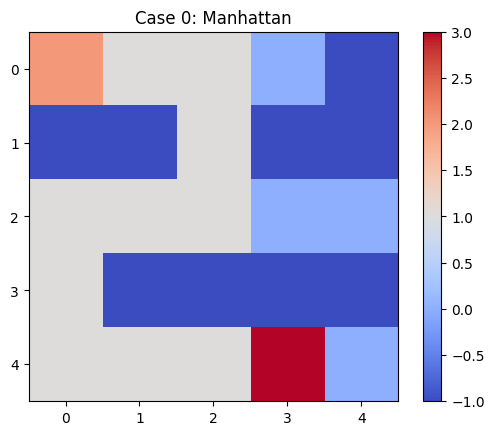

Case 1: Scaled Manhattan (1.5x) → Path cost: 11


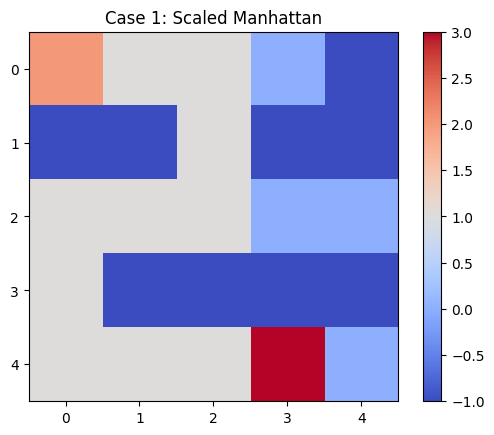

Case 2: Inconsistent heuristic → Path cost: 11


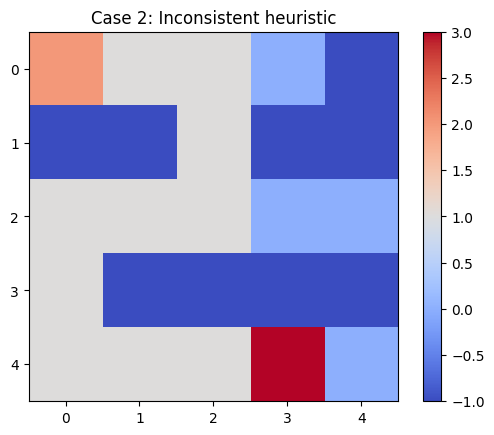

In [11]:
# =====================
# Run Cases
# =====================

# Case 0: Manhattan
path, cost = astar(maze7, start, goal, manhattan)
print("Case 0: Manhattan → Path cost:", cost)
visualize(maze7, path, title="Case 0: Manhattan")

# Case 1: Scaled Manhattan
path, cost = astar(maze7, start, goal, scaled_manhattan)
print("Case 1: Scaled Manhattan (1.5x) → Path cost:", cost)
visualize(maze7, path, title="Case 1: Scaled Manhattan")

# Case 2: Inconsistent heuristic
path, cost = astar(maze7, start, goal, inconsistent_heuristic)
print("Case 2: Inconsistent heuristic → Path cost:", cost)
visualize(maze7, path, title="Case 2: Inconsistent heuristic")


Case 0: Manhattan
Path found: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 1), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3)]
Path cost: 11
Optimal path cost: 9
Is path optimal? -> ❌ No


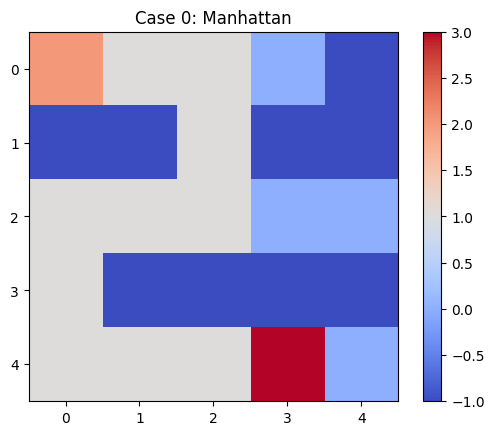


Case 1: Scaled Manhattan (1.5x)
Path found: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 1), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3)]
Path cost: 11
Optimal path cost: 9
Is path optimal? -> ❌ No


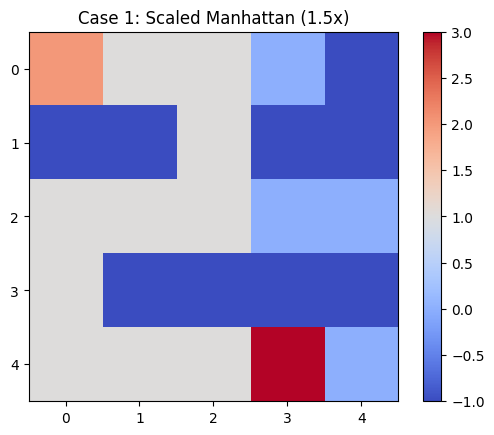


Case 2: Inconsistent heuristic
Path found: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 1), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3)]
Path cost: 11
Optimal path cost: 9
Is path optimal? -> ❌ No


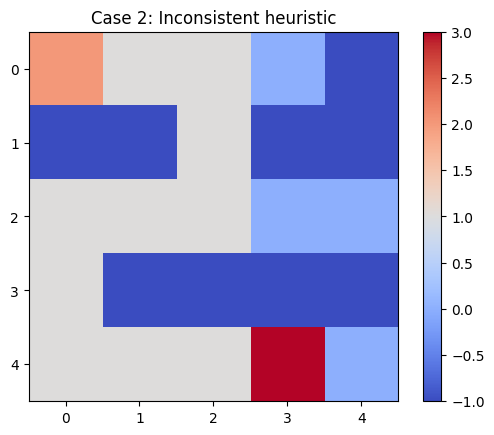

In [12]:
cases = {
    "Case 0: Manhattan": manhattan,
    "Case 1: Scaled Manhattan (1.5x)": scaled_manhattan,
    "Case 2: Inconsistent heuristic": inconsistent_heuristic
}

for name, heuristic_func in cases.items():
    path, cost = astar(maze7, start, goal, heuristic_func)
    is_optimal = (cost == true_cost)
    
    print(f"\n{name}")
    print("Path found:", path)
    print("Path cost:", cost)
    print("Optimal path cost:", true_cost)
    print("Is path optimal? ->", "✅ Yes" if is_optimal else "❌ No")
    
    visualize(maze7, path, title=name)

In [13]:
# A* Search Implementation for Maze

import heapq

# Maze representation
# S=start, G=goal, 1=wall, 0=path
maze = [
    ["S",".",".",".","."],
    ["#","#",".","#","."],
    [".",".",".","#","."],
    [".","#",".",".","."],
    [".",".",".","#","G"]
]

# Directions: up, down, left, right
directions = [(-1,0),(1,0),(0,-1),(0,1)]

# Find start and goal
for i in range(len(maze)):
    for j in range(len(maze[0])):
        if maze[i][j] == "S":
            start = (i,j)
        elif maze[i][j] == "G":
            goal = (i,j)

# Manhattan distance heuristic
def heuristic(node, goal):
    return abs(node[0]-goal[0]) + abs(node[1]-goal[1])

# A* search
def a_star(maze, start, goal):
    open_list = []
    heapq.heappush(open_list, (0 + heuristic(start, goal), 0, start))  # (f, g, node)
    came_from = {}
    g_score = {start:0}
    closed_set = set()
    
    while open_list:
        f, g, current = heapq.heappop(open_list)
        
        if current == goal:
            # reconstruct path
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path, g_score[goal], closed_set
        
        closed_set.add(current)
        
        for dx, dy in directions:
            neighbor = (current[0]+dx, current[1]+dy)
            if 0 <= neighbor[0] < len(maze) and 0 <= neighbor[1] < len(maze[0]):
                if maze[neighbor[0]][neighbor[1]] == "#":
                    continue
                tentative_g = g + 1
                if neighbor in g_score and tentative_g >= g_score[neighbor]:
                    continue
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g
                f_score = tentative_g + heuristic(neighbor, goal)
                heapq.heappush(open_list, (f_score, tentative_g, neighbor))
    
    return None, float('inf'), closed_set  # No path found

# Run A*
path, cost, closed_set = a_star(maze, start, goal)

# Display path and cost
print("Path found:")
print(path)
print("Path cost:", cost)
print("Closed nodes (expanded):")
print(closed_set)

# Visualize the path on maze
maze_vis = [row.copy() for row in maze]
for i,j in path:
    if maze_vis[i][j] not in ["S","G"]:
        maze_vis[i][j] = "*"

print("\nMaze with path (* marks path):")
for row in maze_vis:
    print(" ".join(row))


Path found:
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]
Path cost: 8
Closed nodes (expanded):
{(0, 1), (2, 4), (1, 2), (0, 4), (3, 4), (0, 0), (0, 3), (1, 4), (4, 2), (0, 2), (3, 3), (2, 2), (3, 2)}

Maze with path (* marks path):
S * * * *
# # . # *
. . . # *
. # . . *
. . . # G


Admissible heuristic path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2)] Cost = 4
Inadmissible heuristic path: [(0, 0), (2, 2)] Cost = 5


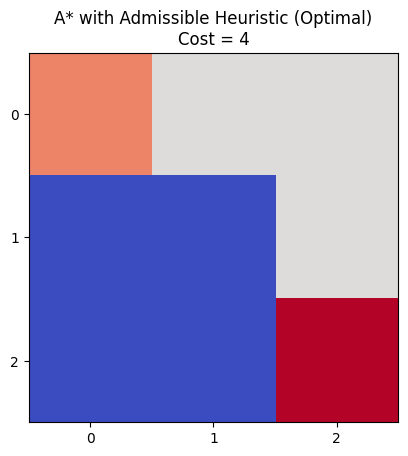

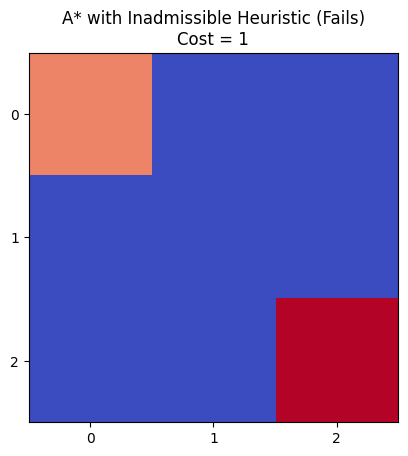

In [14]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

ROWS, COLS = 3, 3

start = (0, 0)  # top-left
goal = (2, 2)   # bottom-right
obstacles = set()

# Special "long corridor" edge: direct S→G with cost 5
special_edge = {(start, goal): 5, (goal, start): 5}

def admissible_h(node):
    # Manhattan distance
    return abs(node[0] - goal[0]) + abs(node[1] - goal[1])

def inadmissible_h(node):
    # Overestimates
    return 2 * (abs(node[0] - goal[0]) + abs(node[1] - goal[1]))

def neighbors(node):
    r, c = node
    for dr, dc in [(1,0), (-1,0), (0,1), (0,-1)]:
        nr, nc = r+dr, c+dc
        if 0 <= nr < ROWS and 0 <= nc < COLS and (nr, nc) not in obstacles:
            yield (nr, nc), 1  # normal move cost = 1
    # Add special corridor if applicable
    if (node, goal) in special_edge:
        yield goal, special_edge[(node, goal)]

def astar(heuristic):
    open_list = []
    heapq.heappush(open_list, (heuristic(start), 0, start, [start]))
    visited = set()
    while open_list:
        f, g, node, path = heapq.heappop(open_list)
        if node in visited:
            continue
        visited.add(node)
        if node == goal:
            return path, g
        for nxt, cost in neighbors(node):
            if nxt not in visited:
                g_new = g + cost
                f_new = g_new + heuristic(nxt)
                heapq.heappush(open_list, (f_new, g_new, nxt, path + [nxt]))
    return None, float("inf")

# Run A*
path_adm, cost_adm = astar(admissible_h)
path_inadm, cost_inadm = astar(inadmissible_h)

print("Admissible heuristic path:", path_adm, "Cost =", cost_adm)
print("Inadmissible heuristic path:", path_inadm, "Cost =", cost_inadm)

# Visualization
def visualize(path, title):
    grid = np.zeros((ROWS, COLS))
    for r, c in obstacles:
        grid[r][c] = -1
    for r, c in path:
        grid[r][c] = 0.5
    sr, sc = start
    gr, gc = goal
    grid[sr][sc] = 0.8  # start
    grid[gr][gc] = 1.0  # goal
    plt.imshow(grid, cmap="coolwarm", origin="upper")
    plt.xticks(range(COLS))
    plt.yticks(range(ROWS))
    plt.title(title + f"\nCost = {len(path)-1 if path else '?'}")
    plt.show()

visualize(path_adm, "A* with Admissible Heuristic (Optimal)")
visualize(path_inadm, "A* with Inadmissible Heuristic (Fails)")

